<h1>Analysis of Indian Banking Stocks & Price Prediction of SBI Limited using LSTM Machine Learning Model</h1>

![Source](https://www.singlestore.com/images/cms/blog-posts/img_blog_post_featured_simulating-billions-stock-market-trades-real-time-analytics.jpg)
[Source] https://www.singlestore.com/images/cms/blog-posts/img_blog_post_featured_simulating-billions-stock-market-trades-real-time-analytics.jpg

## Introduction

An analysis of banking sector in India is carried out using 4 stocks; 

Two PSBs (Public Sector Bank): **SBI Ltd.** & **Canara Bank Ltd.**
Two Private Banks: **ICICI Bank Ltd.** & **HDFC Bank Ltd.**

Risk analysis is carried out based on previous performance of the stocks. Furthermore, a machine learning model **"LSTM"** (Long Short-Term Memory) is implemented on SBI Ltd. for future price prediction along with model's evaluation.


## Project Problem Statements:

   1. What was the change in price of the stock over time?
   2. What was the moving average of the various stocks?
   3. What was the daily return of the stock on average?
   4. What was the correlation between different stocks'?
   5. How much value can be put at risk by investing in a particular stock?
   6. Predicting the closing stock price of SBI Ltd. using LSTM model.

#### Import Important Libraries

In [1]:
 #install yahoo finance
!pip install -q yfinance

#data & array manipulation
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#data acquisition
from pandas_datareader.data import DataReader
import yfinance as yf

#date-time manipulation
from datetime import datetime

In [2]:
#acquiring the data

SBI = yf.download("SBIN.NS", start = "2012-11-24", end = "2022-11-22")
CANR = yf.download("CANBK.NS", start = "2012-11-24", end = "2022-11-22")
ICIC = yf.download("ICICIBANK.NS", start = "2012-11-24", end = "2022-11-22")
HDFC = yf.download("HDFCBANK.NS", start = "2012-11-24", end = "2022-11-22")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#creating pandas dataframe

bank_list = [SBI, CANR, ICIC, HDFC]
bank_name = ['SBI', 'CANARA', 'ICICI', 'HDFC']

for bank, names in zip(bank_list, bank_name):
    bank["bank_name"] = names
    
df = pd.concat(bank_list, axis = 0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,bank_name
Date,,,,,,,
2022-11-15 00:00:00+05:30,1623.150024,1623.150024,1605.250000,1619.000000,1619.000000,5515101,HDFC
2022-11-16 00:00:00+05:30,1618.650024,1642.000000,1612.000000,1632.900024,1632.900024,6789075,HDFC
2022-11-17 00:00:00+05:30,1618.099976,1631.550049,1613.900024,1618.150024,1618.150024,6050465,HDFC
2022-11-18 00:00:00+05:30,1621.000000,1623.000000,1605.250000,1613.900024,1613.900024,5229616,HDFC
2022-11-21 00:00:00+05:30,1607.650024,1612.000000,1590.199951,1597.349976,1597.349976,4172408,HDFC


In [4]:
#general info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9852 entries, 2012-11-26 00:00:00+05:30 to 2022-11-21 00:00:00+05:30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9852 non-null   float64
 1   High       9852 non-null   float64
 2   Low        9852 non-null   float64
 3   Close      9852 non-null   float64
 4   Adj Close  9852 non-null   float64
 5   Volume     9852 non-null   int64  
 6   bank_name  9852 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 615.8+ KB


### 1. What was the change in price of the stock over time?

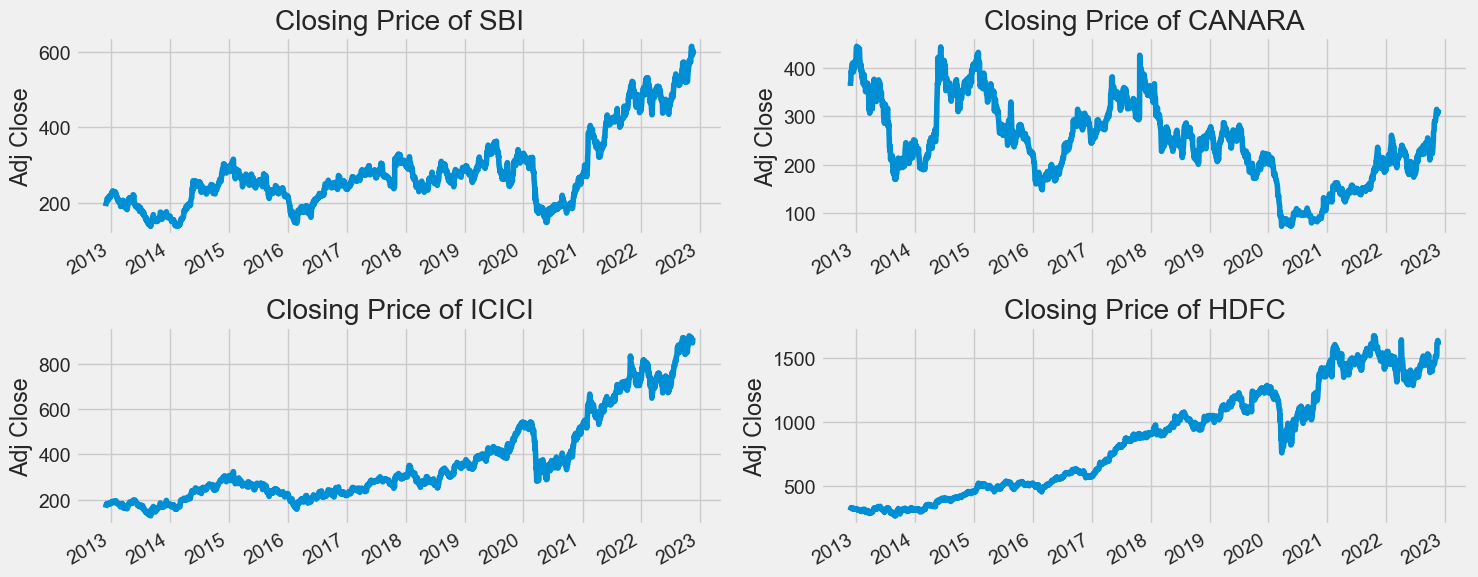

In [5]:
#historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, bank in enumerate(bank_list, 1):
    plt.subplot(2, 2, i)
    bank['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {bank_name[i - 1]}")
    
plt.tight_layout()

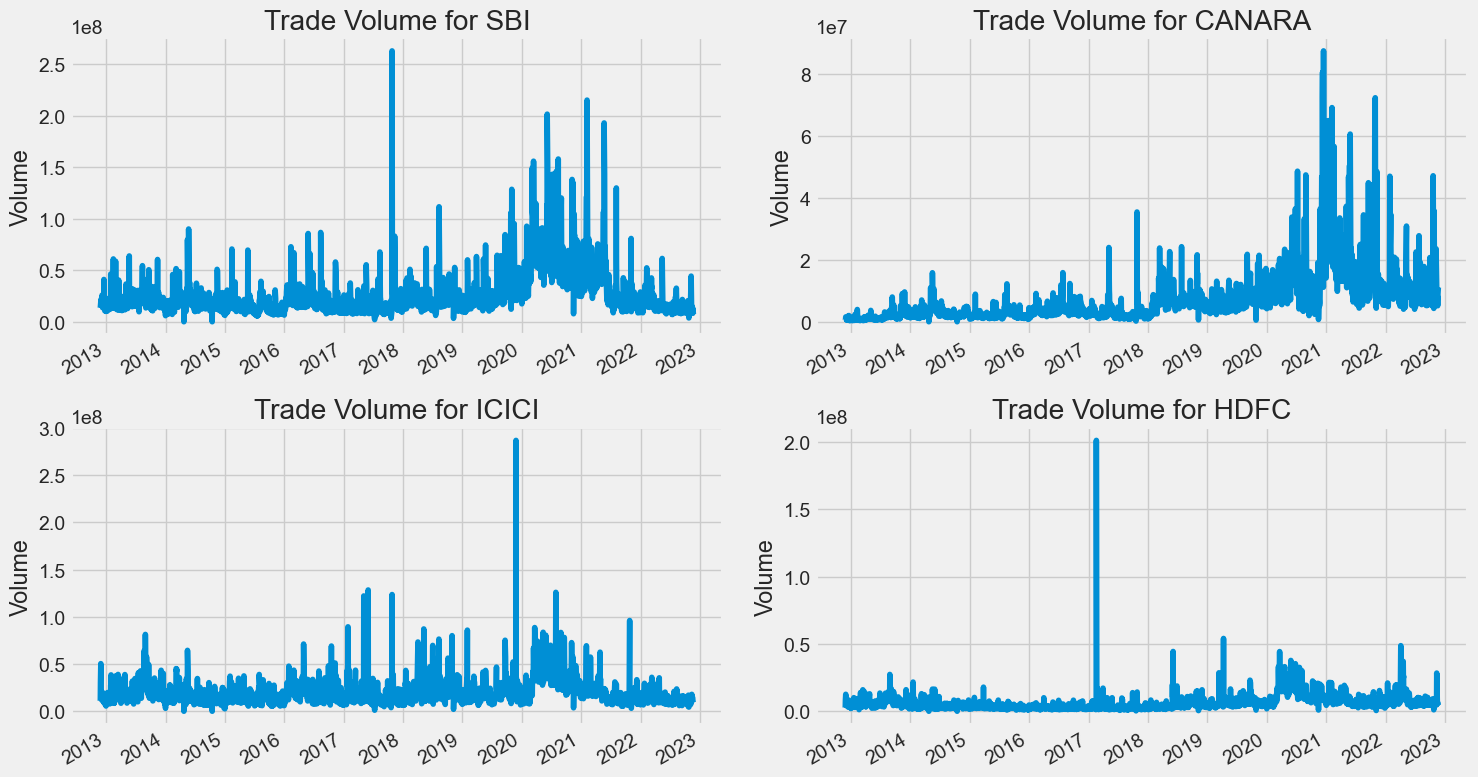

In [6]:
# total volume of stocks traded each day

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, bank in enumerate(bank_list, 1):
    plt.subplot(2, 2, i)
    bank['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Trade Volume for {bank_name[i - 1]}")
    
plt.tight_layout()

### 2. What was the moving average of the various stocks?

In [7]:
#set moving average periods

ma_days = [10, 30, 60]

for ma in ma_days:
    for bank in bank_list:
        column_name = f"MA for {ma} days"
        bank[column_name] = bank['Adj Close'].rolling(ma).mean()

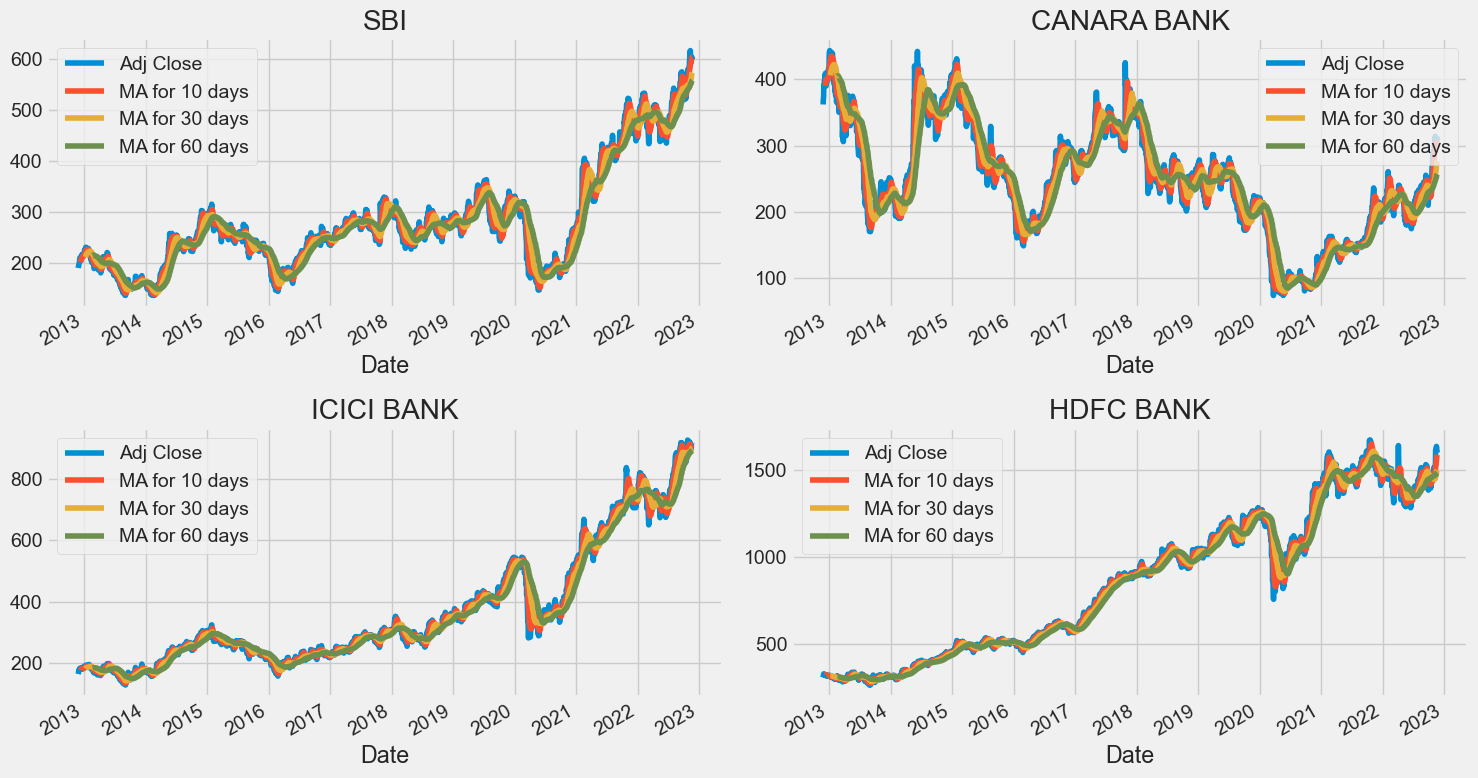

In [8]:
# visualization of moving averages

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

SBI[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('SBI')

CANR[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('CANARA BANK')

ICIC[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ICICI BANK')

HDFC[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('HDFC BANK')

fig.tight_layout()

  ### 3. What was the daily return of the stock on average?

A closer look at daily returns is important instead of absolute value. For as to analyse the risk involved.

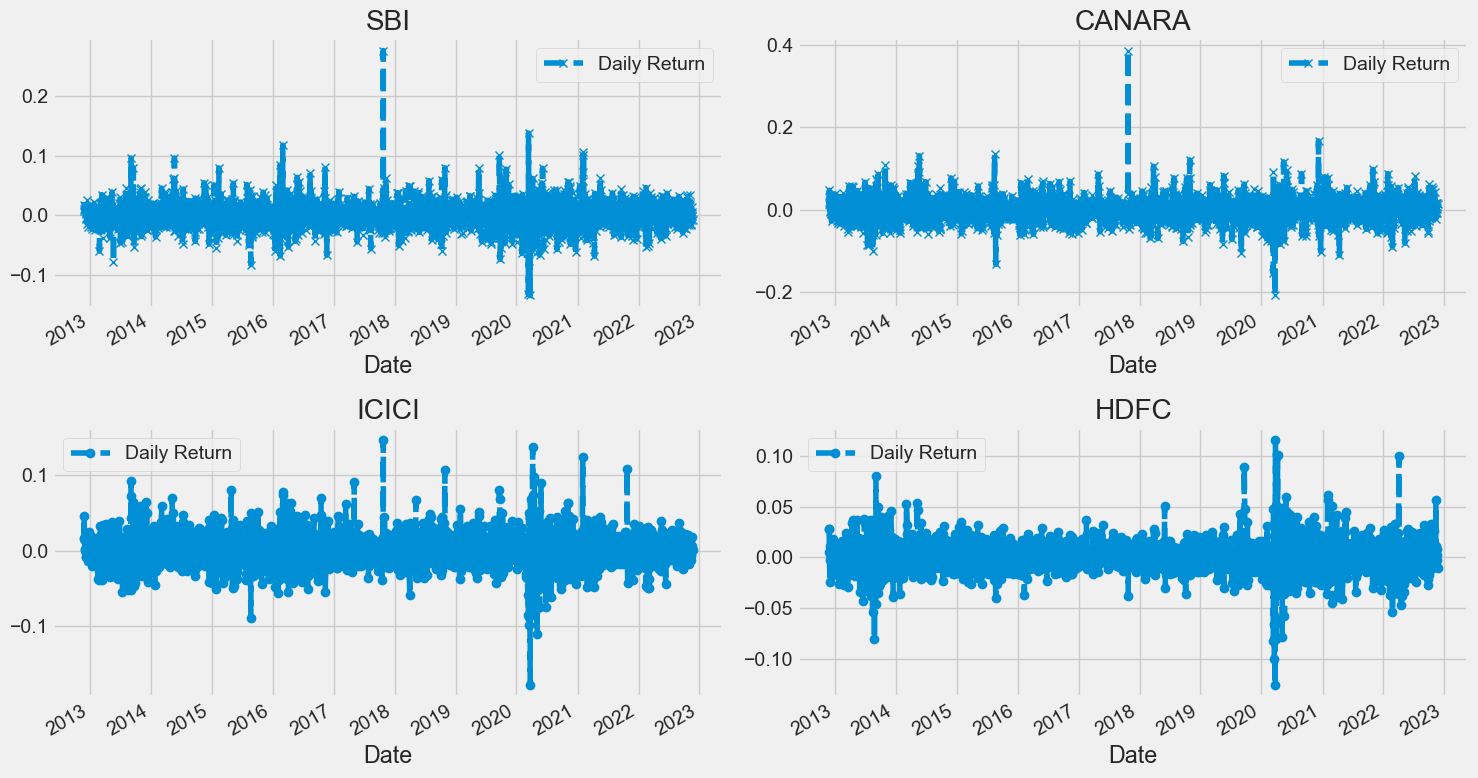

In [9]:
#percent change for each day

for bank in bank_list:
    bank['Daily Return'] = bank['Adj Close'].pct_change()

# plot of daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

SBI['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='x')
axes[0,0].set_title('SBI')

CANR['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='x')
axes[0,1].set_title('CANARA')

ICIC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('ICICI')

HDFC['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('HDFC')

fig.tight_layout()

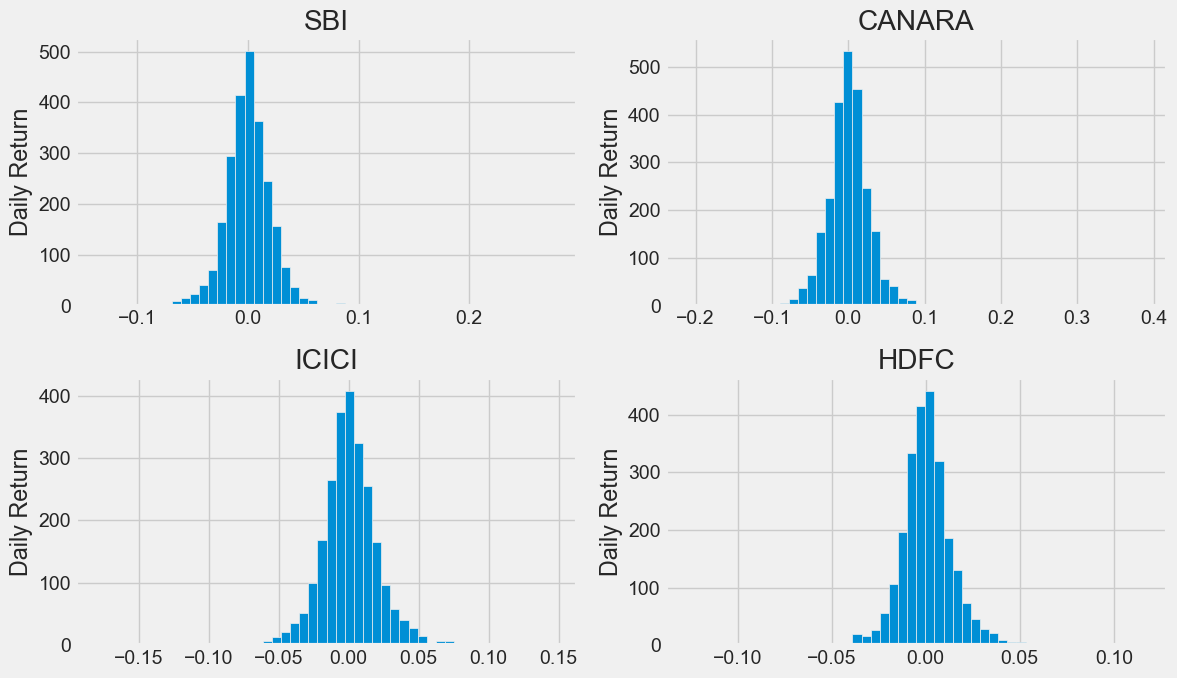

In [10]:
#overall daily return through histogram

plt.figure(figsize=(12, 7))

for i, bank in enumerate(bank_list, 1):
    plt.subplot(2, 2, i)
    bank['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{bank_name[i - 1]}')
    
plt.tight_layout()

### 4. What was the correlation between different stocks closing prices?

In [11]:
# all closing price into one dataframe
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
banks = ['SBIN.NS', 'CANBK.NS', 'ICICIBANK.NS', 'HDFCBANK.NS']
closing_df = DataReader(banks, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,SBIN.NS,CANBK.NS,ICICIBANK.NS,HDFCBANK.NS
Date,,,,
2012-11-26,190.551422,362.220886,163.737091,308.671204
2012-11-27,192.669266,368.966125,166.277679,317.345093
2012-11-29,194.190460,374.193726,173.939529,326.368805
2012-11-30,197.692871,391.689270,176.849915,328.280823
2012-12-03,200.767197,389.834320,177.243851,320.353027


In [12]:
#percentage change

returns = closing_df.pct_change()
returns.head()

Symbols,SBIN.NS,CANBK.NS,ICICIBANK.NS,HDFCBANK.NS
Date,,,,
2012-11-26,NaN,NaN,NaN,NaN
2012-11-27,0.011114,0.018622,0.015516,0.028101
2012-11-29,0.007895,0.014168,0.046079,0.028435
2012-11-30,0.018036,0.046755,0.016732,0.005858
2012-12-03,0.015551,-0.004736,0.002228,-0.024149


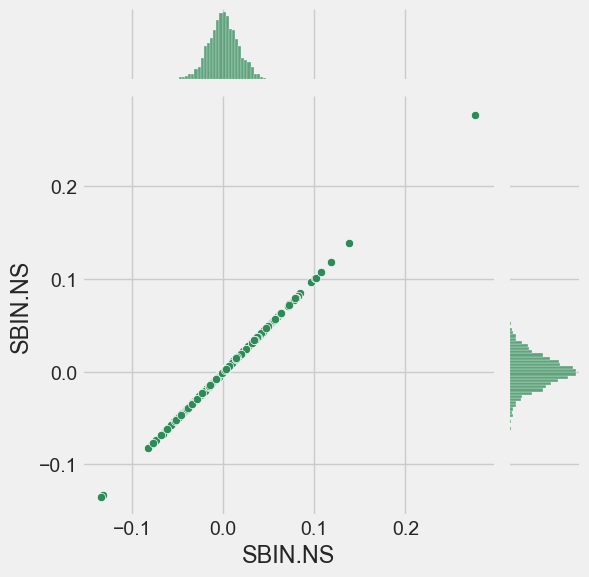

In [13]:
# comparing daily percentage returns of two stocks for correlation

#comparing SBI to itself will give a linear relation
sns.jointplot(x='SBIN.NS', y='SBIN.NS', data=returns, kind='scatter', color='seagreen')

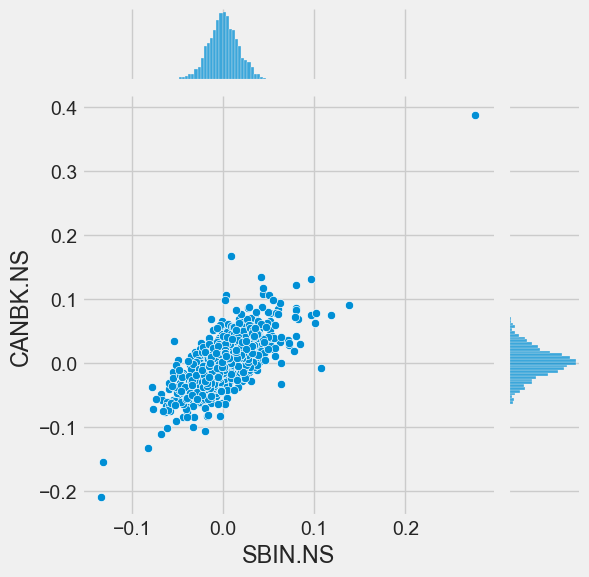

In [14]:
# joinplot to compare the daily returns of SBI and Canara Bank

sns.jointplot(x='SBIN.NS', y='CANBK.NS', data=returns, kind='scatter')

Two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

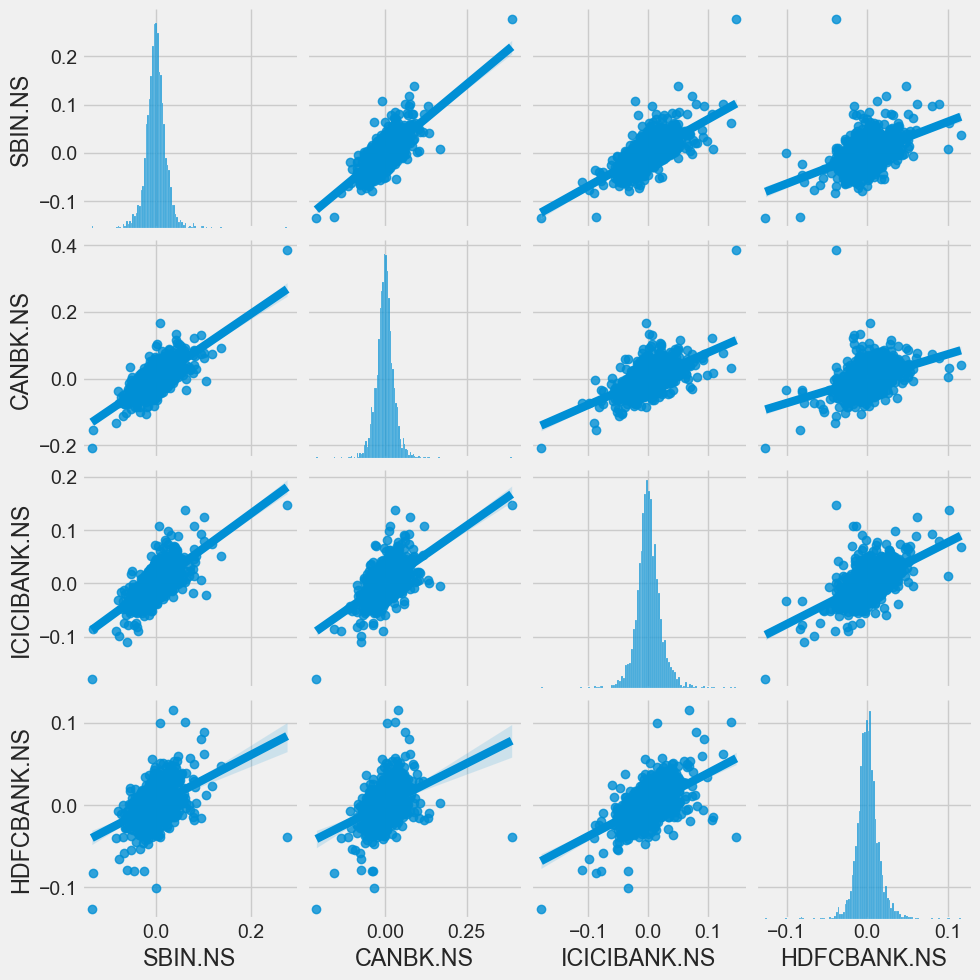

In [15]:
#all comparisons
sns.pairplot(returns, kind='reg')

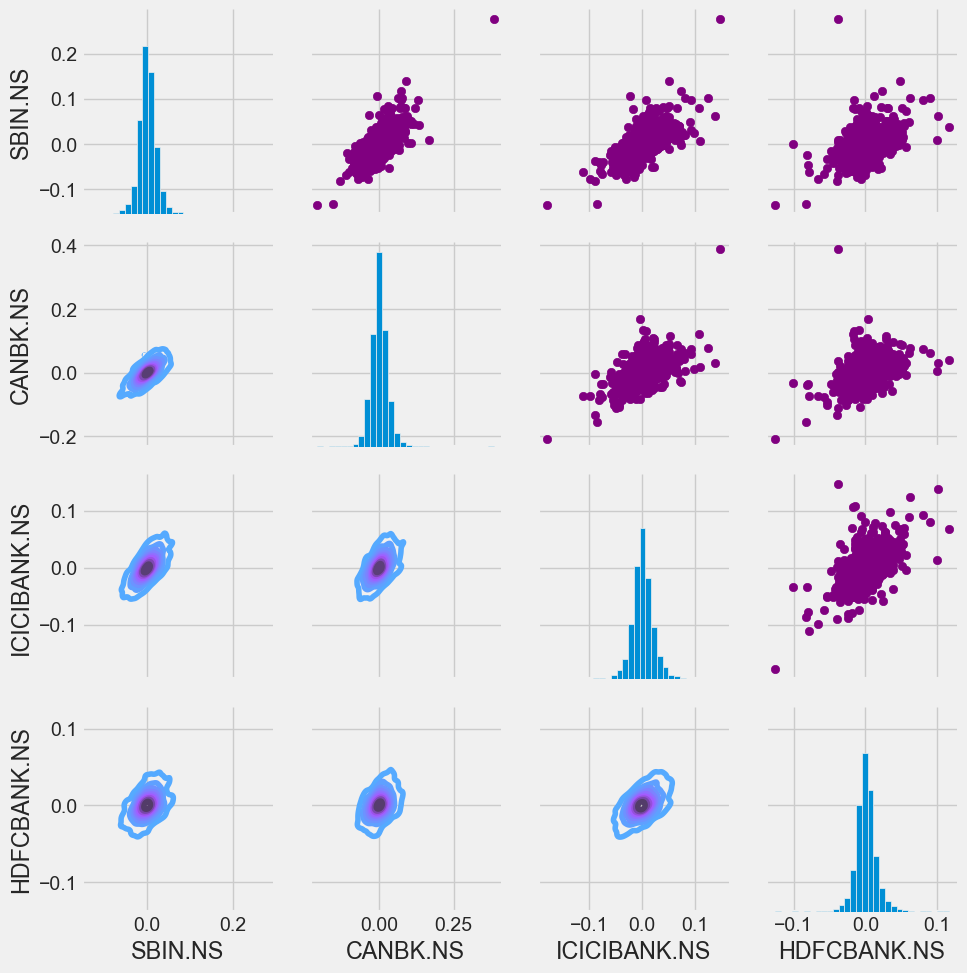

In [16]:
# more clarity over linearity

return_fig = sns.PairGrid(returns.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

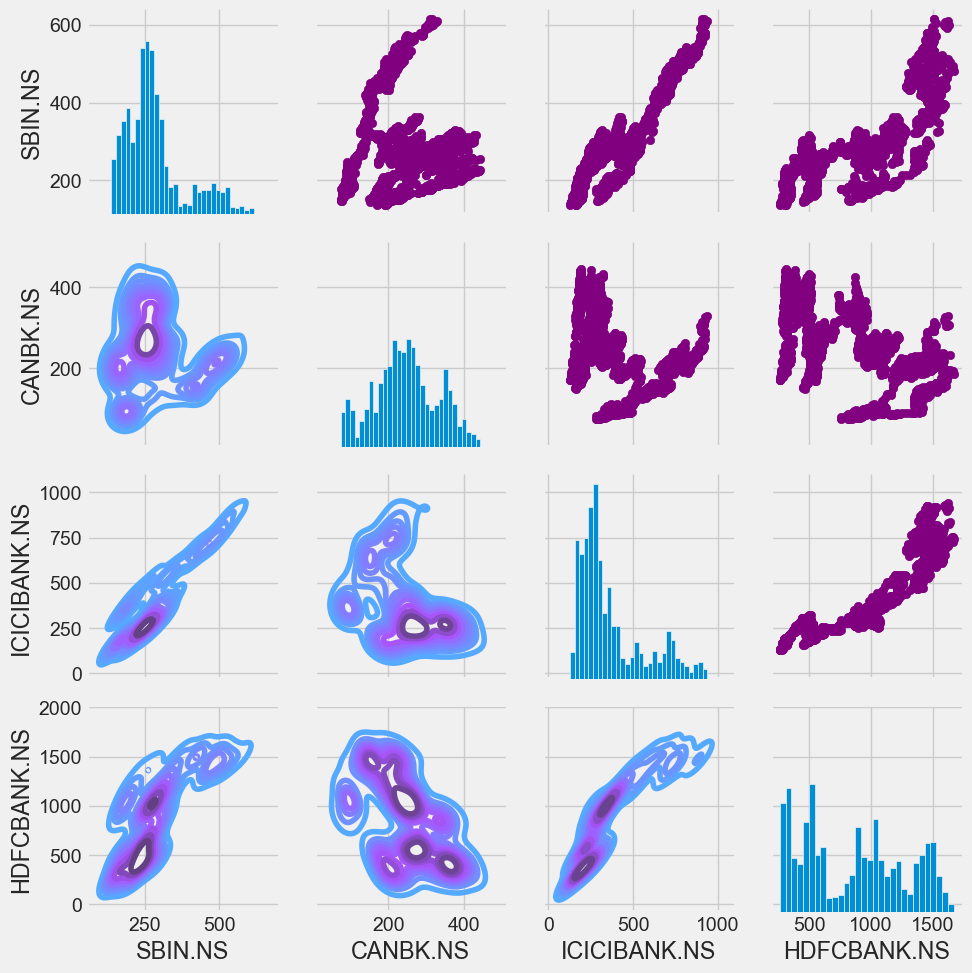

In [17]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

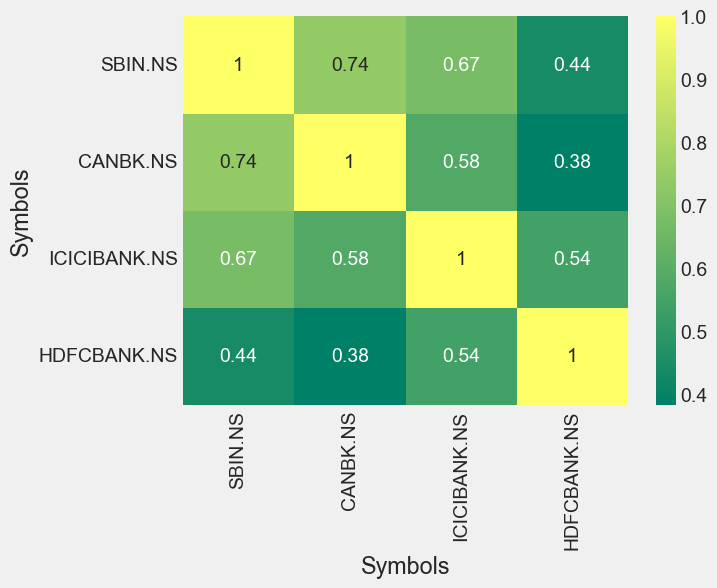

In [18]:
# actual numerical values of the correlation between daily returns of the stocks

sns.heatmap(returns.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

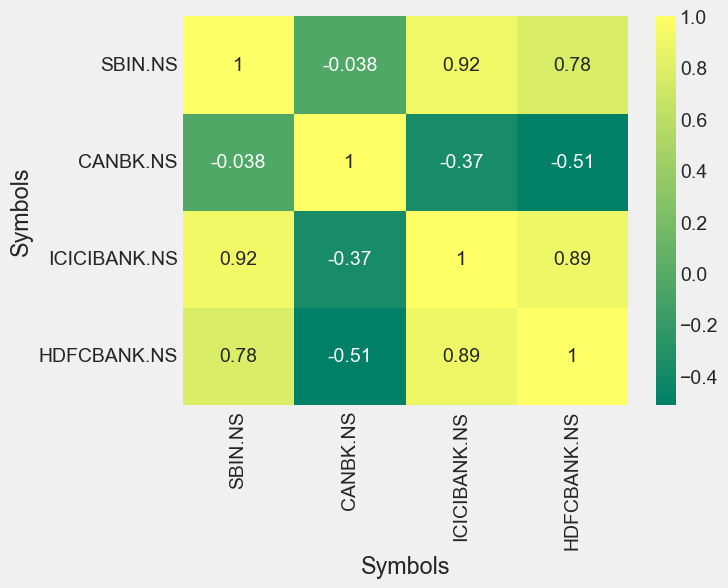

In [19]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

### 5. How much value can be put at risk by investing in a particular stock?

Comparing expected return with the standard deviation of the daily returns for analysing risk.

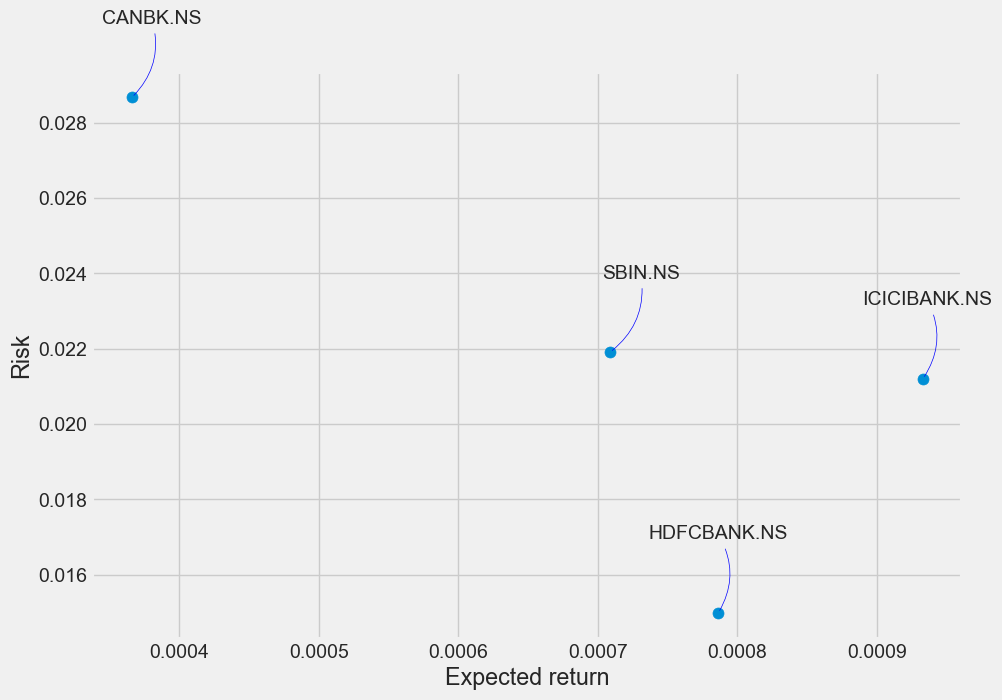

In [20]:
# new dataframe as clean version of returns dataframe
df_return = returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(df_return.mean(), df_return.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(df_return.columns, df_return.mean(), df_return.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

This was already inferred from the past trend that CANARA BANK returns are highly volatile over long run of 10 years. This is now justified by the risk analysis.

### 6. Predicting the closing stock price of SBI Ltd. using LSTM model.

In [21]:
# fresh SBI data from Yahoo for prediction purpose

df = DataReader('SBIN.NS', data_source = 'yahoo', start = '2012-11-24', end = datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-26,210.964996,208.000000,209.649994,209.190002,13539140.0,190.551407
2012-11-27,212.304993,209.500000,210.169998,211.514999,15647840.0,192.669250
2012-11-29,214.199997,210.565002,212.815002,213.184998,20991170.0,194.190475
2012-11-30,218.699997,214.559998,214.899994,217.029999,21590680.0,197.692886
2012-12-03,221.000000,217.350006,218.000000,220.404999,18628530.0,200.767166
...,...,...,...,...,...,...
2022-11-18,605.750000,597.150024,601.000000,602.700012,12933675.0,602.700012
2022-11-21,602.099976,595.349976,602.099976,598.099976,7412419.0,598.099976
2022-11-22,600.700012,596.150024,598.150024,599.099976,8048595.0,599.099976


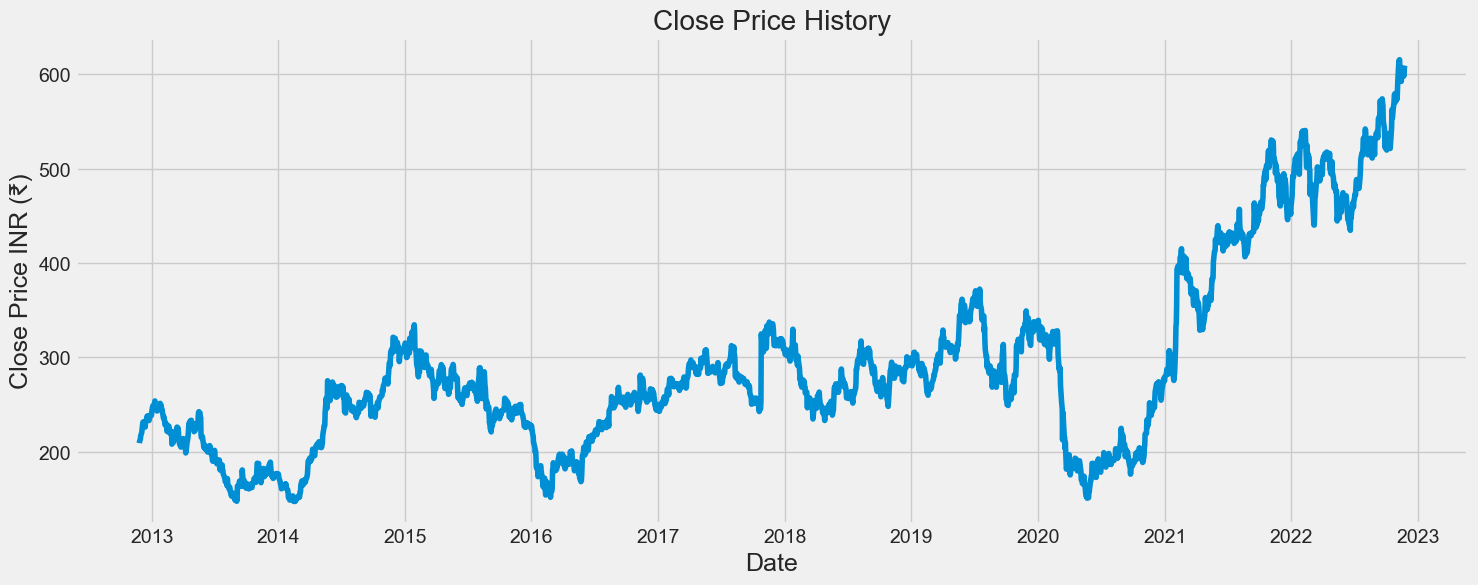

In [22]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.show()

In [23]:
# new dataframe with only close column

data = df.filter(['Close'])

#conversion of dataframe into numpy array
dataset = data.values

# length of training data
train_length = int(np.ceil(len(dataset) * .95))

train_length

2343

In [24]:
# data standardization for machine learning purpose

#scaling data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.13206178],
       [0.1370277 ],
       [0.14059463],
       ...,
       [0.96486466],
       [0.98312659],
       [0.98675749]])

In [25]:
# Creating the training data set 

# Scaled training data set
train_data = scaled_data[0:int(train_length), :]

# Spliting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.13206178, 0.1370277 , 0.14059463, 0.14880711, 0.15601572,
       0.16359812, 0.17048633, 0.17804738, 0.17996966, 0.18083469,
       0.17838913, 0.17542025, 0.16852132, 0.18083469, 0.1859715 ,
       0.19203743, 0.19195198, 0.19386361, 0.18386768, 0.18319487,
       0.1916423 , 0.1953801 , 0.19348982, 0.19477136, 0.20351782,
       0.20866527, 0.21316134, 0.21638651, 0.21230696, 0.21780689,
       0.22409706, 0.22757856, 0.21731562, 0.21917386, 0.21705932,
       0.20478867, 0.21278755, 0.21752922, 0.21910978, 0.21163419,
       0.21504089, 0.21050214, 0.22215339, 0.21742242, 0.21120698,
       0.20557894, 0.20598476, 0.20050621, 0.18774428, 0.19178111,
       0.18691129, 0.182191  , 0.17355135, 0.17530276, 0.17574062,
       0.16683398, 0.1585147 , 0.16229523, 0.1685427 , 0.17084946])]
[0.16626797529170512]

[array([0.13206178, 0.1370277 , 0.14059463, 0.14880711, 0.15601572,
       0.16359812, 0.17048633, 0.17804738, 0.17996966, 0.18083469,
       0.17838913, 0.17542025, 0.16

(2283, 60, 1)

Hence the shape of the ML model training dataset

In [26]:
# deep learning initiation

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Training the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

2283/2283 [==============================] - 39s 16ms/step - loss: 0.0013


Model is trained sucessfully.

In [28]:
# Creating the testing dataset

# Creating a new array containing scaled values from index 2284 to 2343 
test_data = scaled_data[train_length - 60: , :]

# Creating the datasets x_test and y_test
x_test = []
y_test = dataset[train_length:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Converting the data to a numpy array
x_test = np.array(x_test)

# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [29]:
# Getting the model's predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 21ms/step


#### Model Evaluation

In [30]:
# Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.162290617516776

Model is as good as of RSME 9.16

C:\Users\Harsha\AppData\Local\Temp\ipykernel_3272\2306863611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


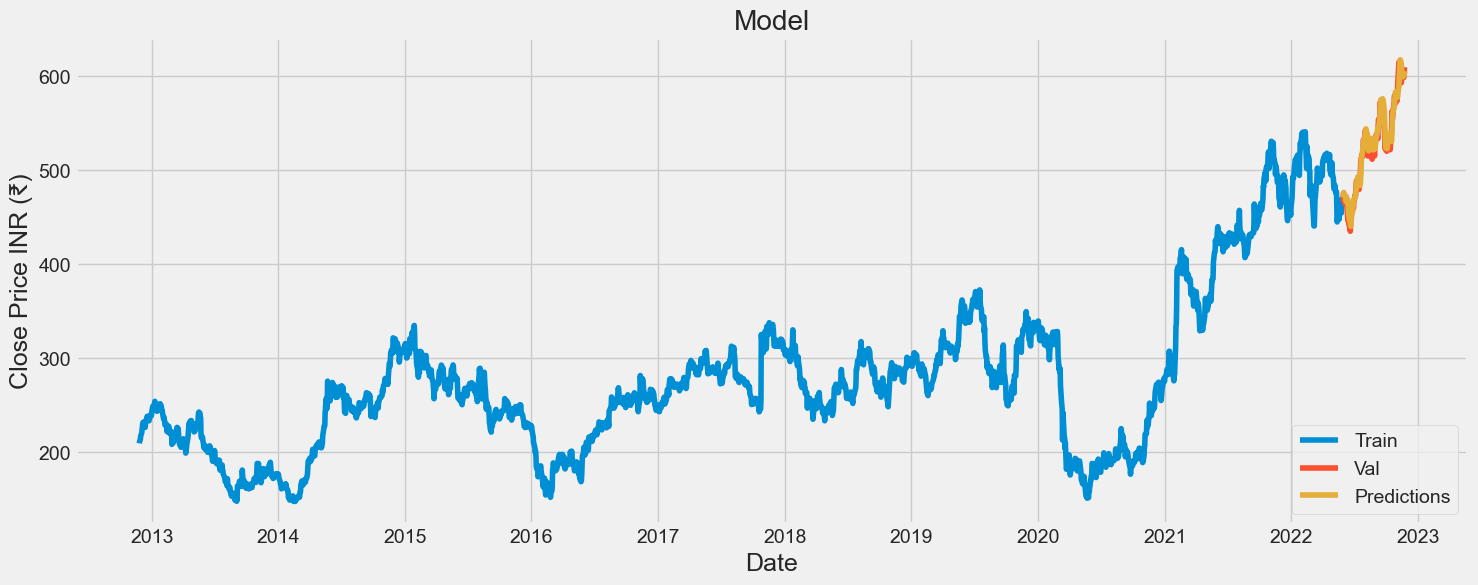

In [31]:
# Plotting the data
train = data[:train_length]
valid = data[train_length:]

valid['Predictions'] = predictions

# Visualize the data

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Close prediction as of original price values.

In [32]:
# predicted data

valid

,Close,Predictions
Date,,
2022-05-30,474.600006,470.791626
2022-05-31,468.100006,475.531128
2022-06-01,468.299988,476.045441
2022-06-02,469.850006,474.930634
2022-06-03,464.500000,474.049988
...,...,...
2022-11-18,602.700012,598.862610
2022-11-21,598.099976,600.720886
2022-11-22,599.099976,600.865479
